<a href="https://colab.research.google.com/github/Batman511/Numerical_methods_5sem/blob/main/%D0%A7%D0%B8%D1%81%D0%BB%D0%B0%D0%BA%D0%B8_1%D0%BB%D0%B0%D0%B1%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

#Полином в форме Лагранжа

Равномерная сетка

      start_x   start_y
0    0.000000  0.099833
1    0.526316  0.118895
2    1.052632  0.141554
3    1.578947  0.168461
4    2.105263  0.200363
5    2.631579  0.238105
6    3.157895  0.282614
7    3.684211  0.334866
8    4.210526  0.395806
9    4.736842  0.466195
10   5.263158  0.546341
11   5.789474  0.635635
12   6.315789  0.731777
13   6.842105  0.829580
14   7.368421  0.919172
15   7.894737  0.983623
16   8.421053  0.996369
17   8.947368  0.919956
18   9.473684  0.709994
19  10.000000  0.332007


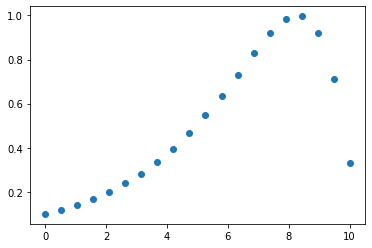

In [3]:
N = 20
start_x = np.linspace(0, 10, N)
start_y = np.sin( np.exp( start_x/3)/10 )
df = pd.DataFrame({'start_x': start_x, 'start_y': start_y})
print(df)
ax = plt.subplot()
ax.scatter(start_x, start_y, marker='o')

функция интерполяции


In [4]:
def interpol(x,y,t):
  assert len(x) == len(y), 'x and y must have the same len'
  assert len(x) != 0, 'x and y cannot be empty'
  sum=0

  for i in range(len(y)):
    P1=1; P2=1
    for j in range(len(y)):
      if i!=j:
        P1 = P1*(t-x[j])
        P2 = P2*(x[i]-x[j])

    sum+=y[i]*P1/P2
  return sum  

Применение функции интерполяции

    interpolation_y    real_y
0          0.099833  0.099833
1          0.103240  0.103240
2          0.106762  0.106762
3          0.110403  0.110403
4          0.114168  0.114168
..              ...       ...
95         0.637802  0.637802
96         0.571019  0.571019
97         0.497730  0.497730
98         0.417999  0.417999
99         0.332007  0.332007

[100 rows x 2 columns]


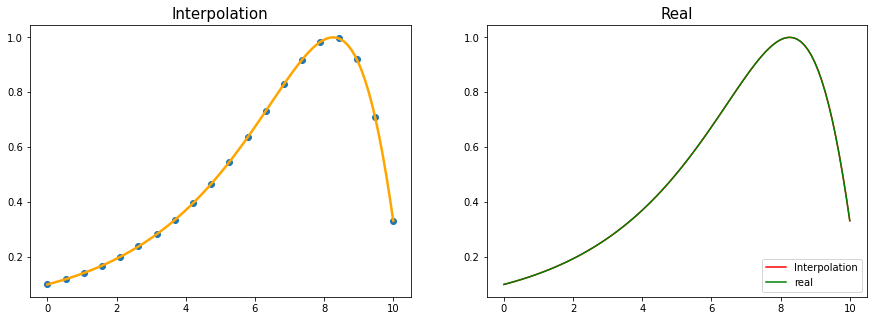

In [5]:
# равномерное разбиение на 100 промежутков
new_x = np.linspace(np.min(start_x), np.max(start_x),100)
new_y = [interpol(start_x, start_y, t) for t in new_x]
real_y = np.sin( np.exp( new_x/3)/10 )

fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1,2,1)
ax.set_title("Interpolation", fontsize=15)
ax.scatter(start_x, start_y, marker='o')
ax.plot(new_x, new_y, linewidth=2.5,c='orange')

ax_real = fig.add_subplot(1,2,2)
ax_real.set_title("Real", fontsize=15)
ax_real.plot(new_x, new_y,c='red', label='Interpolation')
ax_real.plot(new_x, real_y,c='green', label='real')
ax_real.legend(loc='lower right')


df2 = pd.DataFrame({'interpolation_y': new_y, 'real_y': real_y})
print(df2)

In [ ]:
fg = plt.figure(figsize=(25,10))
ax2_real = fg.add_subplot(1,1,1)
ax2_real.plot(new_x, new_y,c='red', label='Interpolation')
ax2_real.plot(new_x, real_y,c='green', label='real')
ax2_real.legend(loc='lower right')

Чебышевская сетка

In [7]:
def cheb_array(a,b,n):
  array = []
  
  for m in range(n):
    array.append( (a+b)/2 + ((b-a)/2)*np.cos( np.pi*m/n + np.pi/(2*n) )  )
  return array

In [8]:
def cheb_array_lengthy(array):
  N = len(array)
  for i in range(N):
    array[i]-=array[N-1]
  for i in range(N):
    array[i]*= 10/array[0]
  return array  

Average Loss:  7.662256688439895e-09 
Average Loss_Cheb:  6.093911725235657e-10


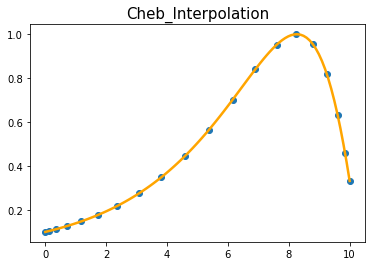

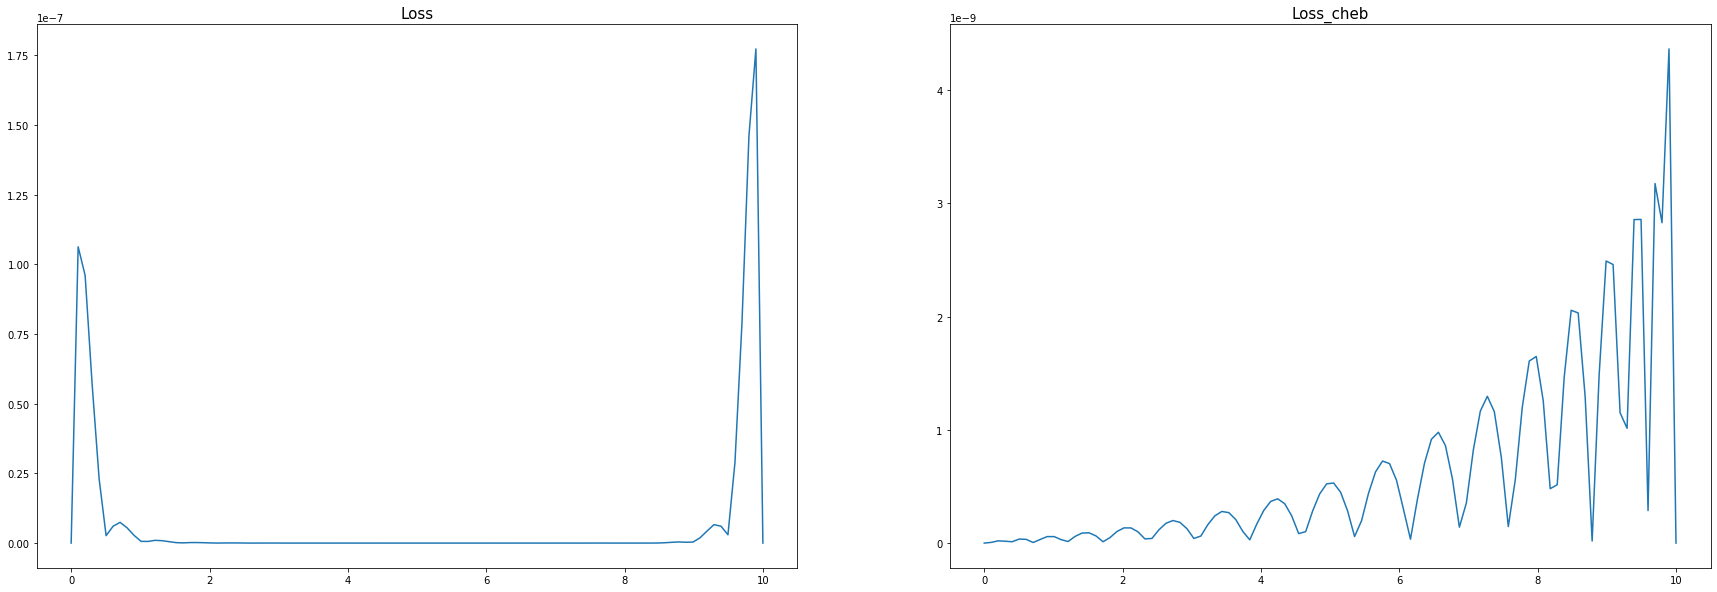

In [9]:
cheb_start_x = cheb_array(0,10,N)
cheb_start_x = cheb_array_lengthy(cheb_start_x)
cheb_start_y = np.sin( np.exp( np.array(cheb_start_x)/3)/10 )
#new_x = np.linspace(np.min(start_x), np.max(start_x),100)
cheb_x = new_x
cheb_y = [interpol(cheb_start_x, cheb_start_y, t) for t in cheb_x]
real_y_cheb = np.sin( np.exp( cheb_x/3)/10 )


ax = plt.subplot()
ax.set_title("Cheb_Interpolation", fontsize=15)
ax.scatter(cheb_start_x, cheb_start_y, marker='o')
ax.plot(cheb_x, cheb_y, linewidth=2.5,c='orange')

#-----------------------------------------------------------
fig = plt.figure(figsize=(30,10))


av_loss = 0
loss = []
for i in range(len(real_y)):
  loss.append( abs(real_y[i]-new_y[i]) )
  if i != 0 and i!= (len(real_y)-1):
    av_loss += abs(real_y[i]-new_y[i])

ax_loss = fig.add_subplot(1,2,1)
ax_loss.set_title("Loss", fontsize=15)
ax_loss.plot(new_x, loss)


av_loss_cheb = 0
loss_cheb = []
for i in range(len(real_y_cheb)):
  loss_cheb.append( abs(real_y_cheb[i]-cheb_y[i]) )
  if i != 0 and i!= (len(real_y_cheb)-1):
    av_loss_cheb += abs(real_y_cheb[i]-cheb_y[i])

ax_loss_cheb = fig.add_subplot(1,2,2)
ax_loss_cheb.set_title("Loss_cheb", fontsize=15)
ax_loss_cheb.plot(cheb_x, loss_cheb)


print("Average Loss: ", av_loss/100, "\nAverage Loss_Cheb: ", av_loss_cheb/100)